<a href="https://colab.research.google.com/github/aarongraybill/Math210/blob/main/ProblemSets/ProblemSet6/ProblemSet6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Math 210
## Aaron Graybill
### Problem Set 6
### 4/8/21



In [2]:
import numpy as np
from scipy.optimize import linprog

## Problem 1.

### 1.a


In [11]:
a1=-np.concatenate((np.identity(4),np.identity(4),np.identity(4)),axis=1)
a2=np.array([[1,1,1,1,0,0,0,0,0,0,0,0],[0,0,0,0,1,1,1,1,0,0,0,0],[0,0,0,0,0,0,0,0,1,1,1,1]])
a=np.append(a1,a2,axis=0)
print(a)

b=np.array([-14,-12, -19, -11,20,15,25])


c=np.array([4,2,3,5,6,4,2,2,2,4,5,4])


linprog(c,A_ub=a,b_ub=b,method="simplex")

[[-1. -0. -0. -0. -1. -0. -0. -0. -1. -0. -0. -0.]
 [-0. -1. -0. -0. -0. -1. -0. -0. -0. -1. -0. -0.]
 [-0. -0. -1. -0. -0. -0. -1. -0. -0. -0. -1. -0.]
 [-0. -0. -0. -1. -0. -0. -0. -1. -0. -0. -0. -1.]
 [ 1.  1.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  1.  1.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1.  1.  1.  1.]]


     con: array([], dtype=float64)
     fun: 134.0
 message: 'Optimization terminated successfully.'
     nit: 15
   slack: array([0., 0., 0., 0., 0., 0., 4.])
  status: 0
 success: True
       x: array([ 0., 12.,  8.,  0.,  0.,  0., 11.,  4., 14.,  0.,  0.,  7.])

### 1.b

In [16]:
a1=np.concatenate((np.identity(5),np.identity(5),np.identity(5)),axis=1)
a2=np.array([
             [1,1,1,1,1,0,0,0,0,0,0,0,0,0,0],
             [0,0,0,0,0,1,1,1,1,1,0,0,0,0,0],
             [0,0,0,0,0,0,0,0,0,0,1,1,1,1,1],
             ])
a_eq=np.append(a1,a2,axis=0)
print(a_eq)

b_eq=np.array([14,12,19,11,4,20,15,25])
c=np.array([4,2,3,5,0,6,4,2,2,0,2,4,5,4,0])

linprog(c,A_eq=a_eq,b_eq=b_eq,method="simplex")

[[1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1.]
 [1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1.]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: OptimizeWarning: A_eq does not appear to be of full row rank. To improve performance, check the problem formulation for redundant equality constraints.
  del sys.path[0]


     con: array([0., 0., 0., 0., 0., 0., 0., 0.])
     fun: 134.0
 message: 'Optimization terminated successfully.'
     nit: 13
   slack: array([], dtype=float64)
  status: 0
 success: True
       x: array([ 0., 12.,  8.,  0.,  0.,  0.,  0., 11.,  4.,  0., 14.,  0.,  0.,
        7.,  4.])

## Problem 2

In [52]:
def assignment_matrix(n_workers,n_tasks):
  #create output matrix with first identity
  a=np.identity(n_tasks)
  # for the remaining number of workers, create an idenitity and add to right
  for i in range(n_workers-1):
    a=np.concatenate((a,np.identity(n_tasks)),axis=1)


  # for the number of workers make a vector of 1s and zeros as desired
  for i in range(n_workers):
    lower_index=n_tasks*i #first index that should be 1
    upper_index=n_tasks*(i+1) #last index that should be 1
    new_vec=np.zeros((n_workers*n_tasks)) #vector of all zeros
    new_vec[lower_index:upper_index]=1 #add ones where required
    new_vec=np.array([new_vec]) # make dimensions conformable with a
    a=np.concatenate((a,new_vec),axis=0) #add new row
  return a 

assignment_matrix(6,6).shape

In [55]:
a_eq=assignment_matrix(6,6)
b_eq=np.ones(12)
c=np.array([6, 8, 5, 9, 6, 7,3, 5, 7, 4, 8, 7,4, 8, 6, 8, 9, 7,7, 5, 5, 6, 4, 3,9, 7, 3, 3, 7, 5,8, 5, 7, 5, 7, 8])

linprog(c,A_eq=a_eq,b_eq=b_eq,method="simplex")


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: OptimizeWarning: A_eq does not appear to be of full row rank. To improve performance, check the problem formulation for redundant equality constraints.
  """


     con: array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
     fun: 25.0
 message: 'Optimization terminated successfully.'
     nit: 31
   slack: array([], dtype=float64)
  status: 0
 success: True
       x: array([0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0.,
       0., 0.])

## Problem 3.

Let $x_i^d,y_i^d$ be the delivery 

In [72]:
print("Horizontal Blocks")
horz=np.abs(np.subtract.outer([4,1,3,6],[3,7,2,7,1]))
print(horz)

print("Vertical Blocks")
vert=np.abs(np.subtract.outer([42,64,41,88],[50,72,90,30,33]))
print(vert)

print("taxicab distance, tenths of miles")
taxi_distance=np.transpose(2*horz+1*vert)
print(taxi_distance)



Horizontal Blocks
[[1 3 2 3 3]
 [2 6 1 6 0]
 [0 4 1 4 2]
 [3 1 4 1 5]]
Vertical Blocks
[[ 8 30 48 12  9]
 [14  8 26 34 31]
 [ 9 31 49 11  8]
 [38 16  2 58 55]]
taxicab distance, tenths of miles
[[10 18  9 44]
 [36 20 39 18]
 [52 28 51 10]
 [18 46 19 60]
 [15 31 12 65]]


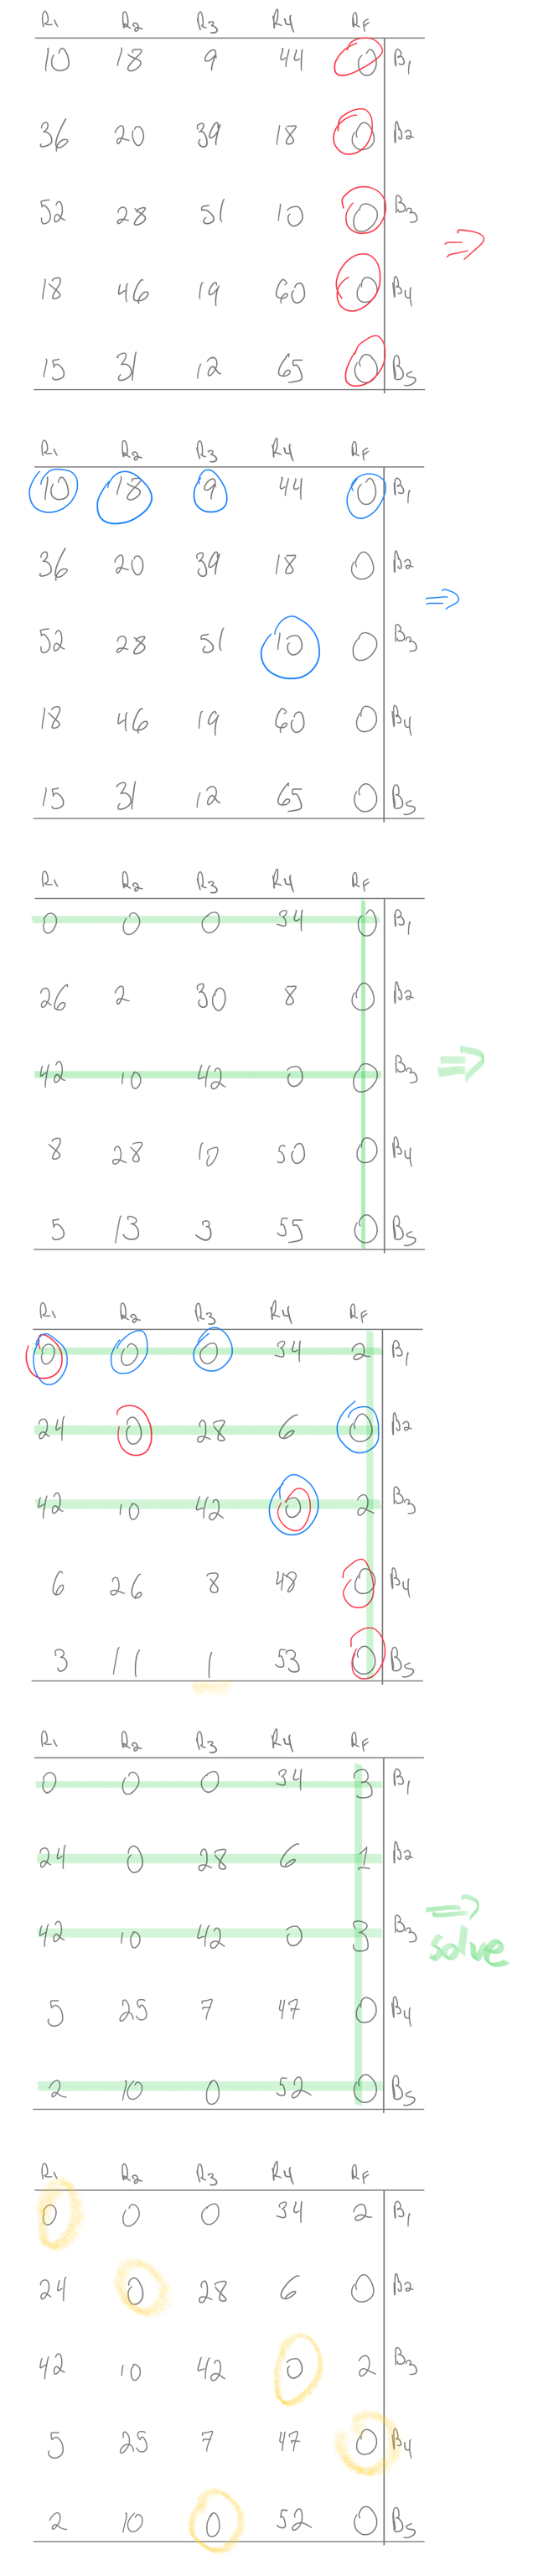

## Problem 4.


In [78]:
assignment_matrix(8,8)


student_ranks=np.array(
    [[1,2,4,3],
     [2,4,1,3],
     [4,3,1,2],
     [3,2,1,4],
     [2,3,4,1],
     [3,1,2,4],
     [3,1,4,2],
     [3,4,2,1]])

faculty_ranks=np.array(
          [[1, 3 ,8, 5, 7, 6, 4, 2],
          [3, 4, 7, 6, 2, 8, 1, 5],
          [3, 2, 4, 1, 5, 8, 7, 6],
          [7, 1, 3, 4, 5, 8, 2, 6]])

